# WORD2VEC 

In [2]:
import nltk
import gensim

In [3]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\havva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\havva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
# Python program to generate word vectors using Word2Vec 

# importing all necessary modules 

from nltk.corpus import stopwords 
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings 

warnings.filterwarnings(action = 'ignore') 

import gensim 
from gensim.models import Word2Vec 
 
stopWords = set(stopwords.words('turkish'))
# data
sentence= """
Antalya Valisi Münir Karaloğlu, kırmızı kodlu uyarının yapıldığı Antalya'da gece yarısında yağışın hızlanacağını belirterek, 
"Kriz merkezinin yönettiği bin 452 personel hazır durumda. 213 ekibimiz var, 252 iş makinesi ve 124 kamyonla olayı takip ediyoruz." dedi.
"""
data = [] 

# iterate through each sentence in the file 
for w in sent_tokenize(sentence):
    temp = [] 

    
# tokenize the sentence into words 
words = word_tokenize(sentence) 
for w in words:
    if w not in stopWords:
        temp.append(w)
data.append(temp)

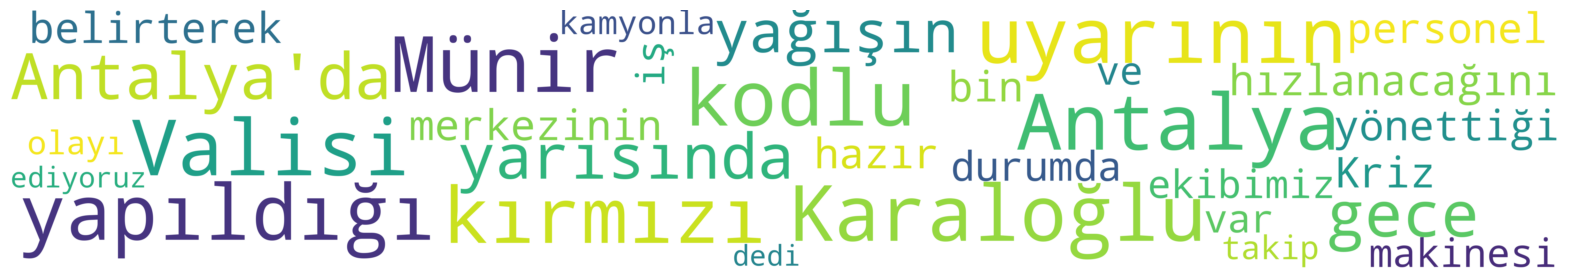

In [5]:
# wordcloud ile görselleştirme
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud 
text = []
for i in sentence:
    text.append(i)
text = ''.join(map(str, text)) 
wordcloud = WordCloud(width=6000, height=1000, max_font_size=300,background_color='white').generate(text)
plt.figure(figsize=(20,17))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
# Create CBOW model 
model1 = gensim.models.Word2Vec(data, min_count = 1, vector_size = 200, alpha=0.25, window=10) 

# Print results 
print("Cosine similarity between 'kodlu' " +
            "ve  'uyarının' - CBOW : ", 
    model1.wv.similarity('kodlu','uyarının')) 

print("Cosine similarity between 'kodlu' " +
            "ve  'yapıldığı' - CBOW : ",
    model1.wv.similarity('kodlu','yapıldığı')) 

# Create Skip Gram model 
model2 = gensim.models.Word2Vec(data, min_count=1, vector_size = 300, alpha=0.025, window = 10, sg = 1) 

# Print results 
print("Cosine similarity between 'kodlu' " +
            "ve  'uyarının' - Skip Gram : ", 
    model2.wv.similarity('kodlu','uyarının')) 
    
print("Cosine similarity between 'kodlu' " +
            "ve 'yapıldığı' - Skip Gram : ", 
    model2.wv.similarity('kodlu','yapıldığı')) 

Cosine similarity between 'kodlu' ve  'uyarının' - CBOW :  -0.0442731
Cosine similarity between 'kodlu' ve  'yapıldığı' - CBOW :  -0.07831117
Cosine similarity between 'kodlu' ve  'uyarının' - Skip Gram :  0.015137946
Cosine similarity between 'kodlu' ve 'yapıldığı' - Skip Gram :  0.019828295


In [17]:
# Bir sonraki kelime tahmini # chatgptden deneme 
# Most similar words to a given word
similar_words = model2.wv.most_similar('kodlu', topn=5)

# Print the most similar words
print("Words most similar to 'kodlu':")
for word, score in similar_words:
    print(f"{word}: {score}")

# Predict the next word in a sequence
input_words = ['kodlu', 'uyarının']
predicted_word = model1.wv.most_similar(input_words, topn=1)
print(f"Next word in the sequence after '{' '.join(input_words)}': {predicted_word[0][0]}")

Words most similar to 'kodlu':
Karaloğlu: 0.11225049197673798
belirterek: 0.09732576459646225
252: 0.09675896167755127
,: 0.08693385869264603
Münir: 0.08206263184547424
Next word in the sequence after 'kodlu uyarının': iş


# TÜRKÇE İÇİN HAZIR WORD2VEC MODELİ  

kaynak kod link: https://github.com/akoksal/Turkish-Word2Vec/tree/master

hazır model (trmodel) link (633mb) : https://drive.google.com/drive/folders/1IBMTAGtZ4DakSCyAoA4j7Ch0Ft1aFoww

In [1]:
from gensim.models import KeyedVectors
word_vectors = KeyedVectors.load_word2vec_format('trmodel', binary=True)

In [2]:
word_vectors.most_similar(positive=["kral","kadın"],negative=["erkek"])  # kadın erkek arasındaki ilişki

[('kraliçe', 0.508816123008728),
 ('kralı', 0.4718089997768402),
 ('kralın', 0.44512391090393066),
 ('kraliçesi', 0.4190150797367096),
 ('prenses', 0.4071305990219116),
 ('hükümdar', 0.4056030511856079),
 ('prens', 0.3978962004184723),
 ('kraliçenin', 0.39632880687713623),
 ('veliaht', 0.38219931721687317),
 ('tahtı', 0.3773398697376251)]

Kral kelime vektöründen erkek kelime vektörü çıkarılıp kadın eklendiğinde en yakın kelime vektörü kraliçe oluyor. Benzerlerin bir çoğu da kral ve kraliçenin ek almış halleri oluyor. Türkçe sondan eklemeli bir dil olduğu için bazı sonuçlar beklenildiği gibi çıkmayabiliyor. Eğer word2vec'i kelimelerin lemmalarını bularak eğitebilseydik, çok daha temiz sonuçlar elde edebilirdik.

In [3]:
word_vectors.most_similar(positive=["geliyor","gitmek"],negative=["gelmek"]) # Fiiler arsındaki ilişki

[('gidiyor', 0.5926218628883362),
 ('gidiyorum', 0.5690364837646484),
 ('gidelim', 0.5637924671173096),
 ('geldim', 0.5413458943367004),
 ('bakıyor', 0.5373592376708984),
 ('gittim', 0.5343413949012756),
 ('gideceğim', 0.5251941680908203),
 ('geldik', 0.5050601363182068),
 ('geliyoruz', 0.5047824382781982),
 ('gider', 0.504159688949585)]

Bu örnekte ise filler için zaman eklerinin etkisini inceledik. En benzer kelime vektörleri beklenen sonuç ile alakalı çıktı.

In [4]:
word_vectors.doesnt_match(["elma","portakal","çilek","ev"])

'ev'

Bu method ise kelime listesi arasındaki farklı olanı bulmaya yarıyor ve beklenildiği gibi çalışıyor.